In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [2]:
wine=pd.read_csv('wine (1).csv')

# EDA

In [3]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
wine.shape

(178, 14)

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
wine.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [9]:
wine['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

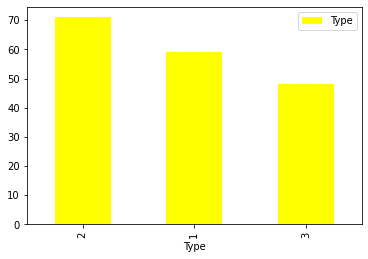

In [10]:
wine["Type"].value_counts().plot.bar(color='Yellow')
plt.xlabel("Type")
plt.legend()

In [11]:
wine[wine.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [12]:
X = wine.iloc[:, 1:].values
wine_norm=StandardScaler().fit_transform(X)

In [13]:
wine_norm.shape

(178, 13)

In [14]:
wine_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# Building PCA

In [15]:
pca = PCA()
principalComponents = pca.fit_transform(wine_norm)

In [16]:
principalComponents

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [17]:
PCA_dataset = pd.DataFrame(data = principalComponents, columns = ['component1', 'component2', 'component3', 'component4', 
                                                                  'component5', 'component6','component7', 'component8', 'component9',
                                                                 'component10', 'component11', 'component12', 'component13'] )
PCA_dataset.head()

,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,component11,component12,component13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [18]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

<BarContainer object of 13 artists>

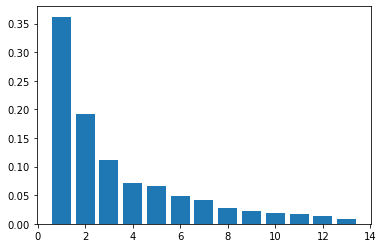

In [19]:
plt.bar(range(1,len(var)+1),var)

In [20]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [21]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

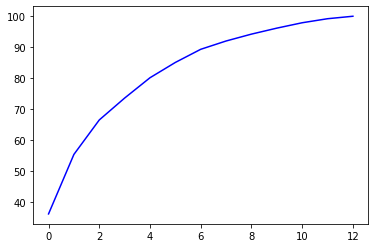

In [22]:
plt.plot(var1,color="Blue")

 As our problem is suggesting to use first 3 principal components for further computation, Extracting the three features from PCA_dataset

In [23]:
principal_component1 = PCA_dataset['component1']
principal_component2 = PCA_dataset['component2']
principal_component3 = PCA_dataset['component3']

In [24]:
pca_df = pd.concat([principal_component1, principal_component2, principal_component3], axis = 1)
pca_df.head()

,component1,component2,component3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


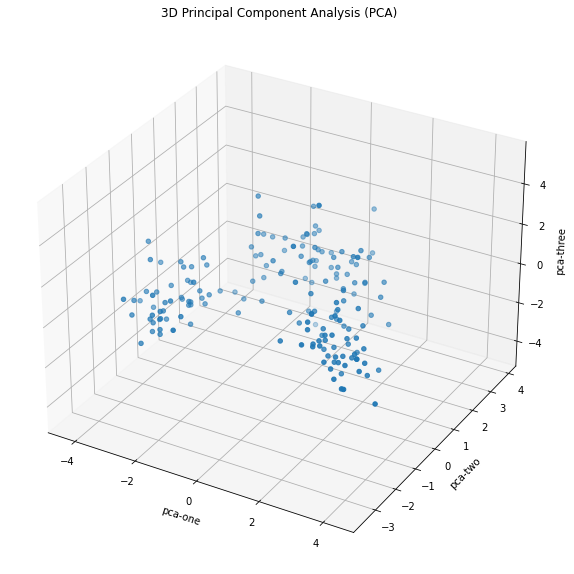

In [25]:
ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D Principal Component Analysis (PCA)')
ax.scatter(
    xs=principal_component1, 
    ys=principal_component2, 
    zs=principal_component3, 
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

# Agglomarative Assignment

In [26]:
scaler = MinMaxScaler()
pca_df_normal = scaler.fit_transform(pca_df)
print(pca_df_normal)

[[0.88409355 0.28044707 0.44502757]
 [0.75524083 0.52098937 0.25765258]
 [0.79099786 0.33626383 0.56068773]
 [0.93533214 0.10271162 0.44397497]
 [0.6155344  0.35810263 0.66580576]
 [0.85308182 0.18853559 0.39833717]
 [0.7831255  0.31681056 0.36332375]
 [0.73778236 0.25804241 0.47644818]
 [0.79031526 0.35157211 0.28338035]
 [0.81856406 0.36898588 0.36260348]
 [0.9030599  0.2995525  0.41914796]
 [0.70232687 0.39300963 0.34179568]
 [0.7440692  0.38438229 0.37460304]
 [0.9005487  0.32279689 0.3404465 ]
 [1.         0.19211296 0.33444109]
 [0.76637997 0.25078783 0.48366041]
 [0.75087591 0.16079663 0.54547303]
 [0.71910927 0.25500921 0.54176564]
 [0.91030363 0.13493476 0.4128317 ]
 [0.74070149 0.33220437 0.4451275 ]
 [0.86171036 0.36932981 0.42497329]
 [0.62457173 0.44313012 0.55606991]
 [0.7931488  0.48828916 0.43030582]
 [0.68955378 0.54574762 0.47620682]
 [0.70312085 0.51879034 0.55136962]
 [0.61334326 0.34851312 0.84648431]
 [0.7047153  0.38296507 0.45298678]
 [0.64189357 0.48801387 0.32

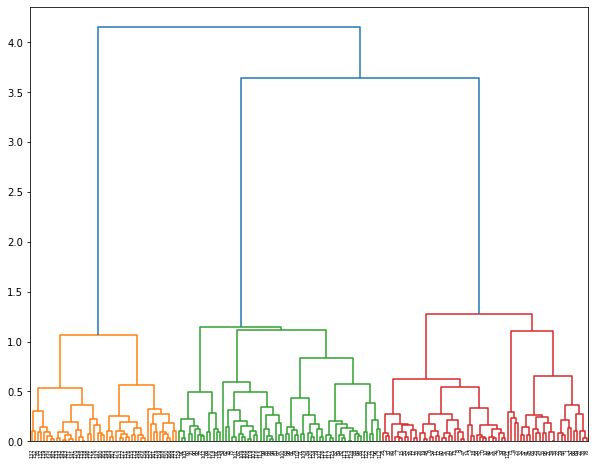

In [28]:
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(pca_df_normal,'ward'))

In [29]:
H_clusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=3)

In [30]:
y=pd.DataFrame(H_clusters.fit_predict(pca_df_normal),columns=['clustersid_H'])
y['clustersid_H'].value_counts()

0    66
2    65
1    47
Name: clustersid_H, dtype: int64

In [31]:
wine_1=wine.copy()
wine_1['clustersid_H']=H_clusters.labels_
wine_1

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clustersid_H
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [32]:
wine_1['clustersid_H'].value_counts()

0    66
2    65
1    47
Name: clustersid_H, dtype: int64

In [33]:
wine['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

# K-means Clustering

In [49]:
# As we already have normalized data
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


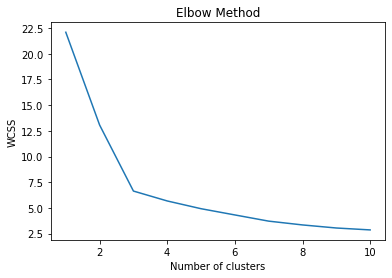

In [34]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_df_normal)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
KM_clusters = KMeans(3, random_state=42)
KM_clusters.fit(pca_df_normal)

KMeans(n_clusters=3, random_state=42)

In [36]:
y=pd.DataFrame(KM_clusters.fit_predict(pca_df_normal),columns=['clusterid_Kmeans'])

In [37]:
y['clusterid_Kmeans'].value_counts()

0    68
2    61
1    49
Name: clusterid_Kmeans, dtype: int64

In [38]:
wine_2=wine.copy()
wine_2['clusterid_Kmeans']=KM_clusters.labels_
wine_2

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_Kmeans
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


# Preparing Actual Vs. Predicted Clusering Data

In [39]:
wine_Type = wine['Type']
wine_Type = pd.Series(wine_Type)

In [40]:
clustersid_HC = H_clusters.labels_
clustersid_HC = pd.Series(clustersid_HC)

In [41]:
clusterid_Kmeans = KM_clusters.labels_
clusterid_Kmeans = pd.Series(clusterid_Kmeans)

In [42]:
pred_wine = pd.concat([wine_Type, clustersid_HC, clusterid_Kmeans],axis = 1)
pred_wine

,Type,0,1
0,1,0,2
1,1,0,2
2,1,0,2
3,1,0,2
4,1,0,2
...,...,...,...
173,3,1,1
174,3,1,1
175,3,1,1
176,3,1,1


In [43]:
#After performing Such algoritims we find that Aglomarative Clustering is giving us more accuracy


# PCA as Noise Filtering

In [44]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))


In [45]:
np.random.seed(42)
noisy = np.random.normal(wine_norm.data, 4)


In [46]:
pca = PCA(0.30).fit(noisy)
pca.n_components_

3

In [47]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)

In [48]:
filtered.shape

(178, 13)

In [49]:
var = pca.explained_variance_ratio_
var

array([0.11849197, 0.11319227, 0.09806736])

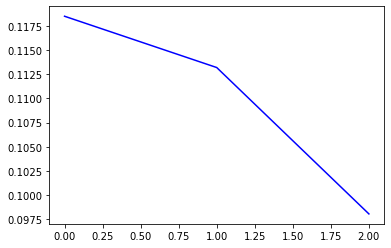

In [50]:
plt.plot(var,color="Blue")

In [51]:
pca.components_

array([[ 0.02450947, -0.10820935,  0.05632472,  0.25228905,  0.08923853,
        -0.2998596 ,  0.01688939,  0.38956897, -0.67984006, -0.0649575 ,
        -0.29794894, -0.33285518,  0.07050618],
       [-0.04865536,  0.3046327 ,  0.43523258,  0.35956539, -0.10184711,
        -0.00748534, -0.28816328, -0.17405726,  0.22531512,  0.46961136,
        -0.25725127, -0.33843443, -0.10166721],
       [ 0.01406378, -0.1476017 ,  0.2276751 ,  0.20320747, -0.53400574,
         0.00307931,  0.05968892, -0.04095176,  0.18683857, -0.66023544,
         0.0859909 , -0.30937325, -0.1433512 ]])

In [52]:
PCA_dataset = pd.DataFrame(data = filtered, columns = ['component1', 'component2', 'component3', 'component4', 
                                                                  'component5', 'component6','component7', 'component8', 'component9',
                                                                 'component10', 'component11', 'component12', 'component13'] )
PCA_dataset.head()

,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,component11,component12,component13
0,0.430266,0.502703,0.426057,1.338408,0.831724,-0.985746,-0.607629,1.764924,-2.001387,0.157106,-1.373920,-1.530229,0.534422
1,0.663287,-0.767965,-2.202816,-0.652364,2.690029,-1.271915,0.693068,3.132063,-4.272094,-0.672599,-0.619740,0.521971,1.449573
2,0.246892,0.697160,1.994175,0.587097,-4.464715,2.192446,-0.531280,-2.802775,6.832915,-4.081966,2.254258,-0.763993,-1.435562
3,0.045526,2.731310,1.371407,0.741388,0.877922,0.943234,-1.999516,-1.411779,3.000030,3.769982,-0.628815,-0.112488,-0.058665
4,0.354053,0.860287,3.414221,4.474810,-1.604161,-1.884447,-1.535374,1.991297,-2.242379,-0.826412,-2.981979,-5.262689,-0.300218


In [53]:
principal_component1 = PCA_dataset['component1']
principal_component2 = PCA_dataset['component2']
principal_component3 = PCA_dataset['component3']
pca_df = pd.concat([principal_component1, principal_component2, principal_component3], axis = 1)
pca_df.head()

,component1,component2,component3
0,0.430266,0.502703,0.426057
1,0.663287,-0.767965,-2.202816
2,0.246892,0.697160,1.994175
3,0.045526,2.731310,1.371407
4,0.354053,0.860287,3.414221


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


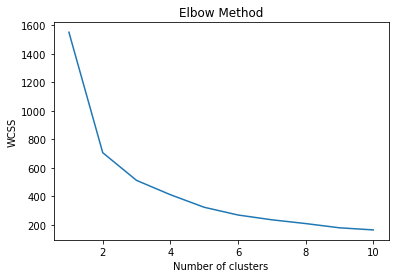

In [54]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
KM_clusters = KMeans(3, random_state=42)
KM_clusters.fit(pca_df)
y=pd.DataFrame(KM_clusters.fit_predict(pca_df),columns=['clusterid_Kmeans'])

In [56]:
wine_2=wine.copy()
wine_2['clusterid_Kmeans']=KM_clusters.labels_
wine_2

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_Kmeans
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [57]:
wine_Type = wine['Type']
wine_Type = pd.Series(wine_Type)
clusterid_Kmeans = KM_clusters.labels_
clusterid_Kmeans = pd.Series(clusterid_Kmeans)
pred_wine = pd.concat([wine_Type, clusterid_Kmeans],axis = 1)
pred_wine

,Type,0
0,1,0
1,1,1
2,1,2
3,1,2
4,1,2
...,...,...
173,3,0
174,3,2
175,3,0
176,3,2
